In [1]:
import numpy as np
import statsmodels.stats.weightstats as sts
import scipy.stats as sst

import matplotlib.pyplot as plt

Generate a normal random variable $X$ with known mean and variance, and plot it.

mean and variance:   0.000 vs   0.000  -    1.000 vs   1.000


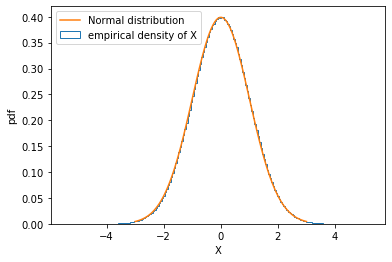

In [2]:
n_sample = 10000000

x_mean=0
x_sdev=1

X = np.random.normal(loc = x_mean, scale = x_sdev, size = n_sample)#*sign_x

print('mean and variance: {:7.3f} vs {:7.3f}  -  {:7.3f} vs {:7.3f}'.format(X.mean(),x_mean,X.std(ddof = 1)**2,x_sdev**2))

plt.hist(X,density = True, bins = 200, histtype = 'step', label = 'empirical density of X')
h = np.linspace(- 3, 3, 100)
plt.plot(h, sst.norm.pdf(h, x_mean, x_sdev), label = 'Normal distribution')
plt.xlabel('X')
plt.ylabel('pdf')
plt.legend()
plt.show()

## z-test on sample mean

Establish $H_0:=\{\mathbb E[X]=a\}$ vs $H_1:=\{\mathbb E[X]=b\}$.
Compute the likelihood ratio:

$$ LR:=\frac{\prod_i \exp\left[-\frac{(x_i-b)^2}{2\sigma^2}\right]}{\prod_i \exp\left[-\frac{(x_i-a)^2}{2\sigma^2}\right]}=
\prod_i \exp\left[\frac{(x_i-a)^2-(x_i-b)^2}{2\sigma^2}\right] =
\prod_i \exp\left[\frac{(b-a)x_i}{\sigma^2}-\frac{b^2-a^2}{2\sigma^2}\right]=
\exp\left[\frac{(b-a)\sum_i x_i}{\sigma^2}-\frac{N(b^2-a^2)}{2\sigma^2}\right]=
\exp\left[\frac{(b-a)\frac 1N\sum_i x_i}{N^{-1}\sigma^2}-\frac{b^2-a^2}{2N^{-1}\sigma^2}\right].$$

Define a rejection region as $\mathcal R:=\{X:LR>c\}$ for some $c$ to be defined, and select it such that $\mathbb P(X\in \mathcal R)=\alpha$.
Check that:
$$ LR>c \Leftrightarrow
\frac{ \frac 1N\sum_i x_i-a}{N^{-\frac12}\sigma}\gtrless\frac{\sigma\ln c}{N^{\frac12}(b-a)}+ \frac{b-a}{2N^{-\frac12}\sigma}\Rightarrow
\mathbb P_{H_0}(X\in\mathcal R)=\Phi\left(\mp \left(\frac{\sigma\ln c}{N^{\frac12}(b-a)}+ \frac{b-a}{2N^{-\frac12}\sigma}\right)\right)=\alpha\Rightarrow
\ln c =\mp \frac{\sqrt N(b-a)}{\sigma}q_\alpha-\frac{N(b-a)^2}{2\sigma^2}.$$
Note: if $\alpha$ grows, $c$ decreases, meaning that the rejection region widens. It makes sense, because we reject $H_0$ more likely.

The p-value $\pi$ is defined as $\pi:=\inf\{\alpha:LR>c\}$, that is:
$$ LR>c \Rightarrow \frac{ \frac 1N\sum_i x_i-a}{N^{-\frac12}\sigma}\gtrless\pm q_{1-\alpha}.$$

Verify the computations: perform a z-test assuming $b\gtrless a$ and check if $\frac{ \frac 1N\sum_i x_i-a}{N^{-\frac12}\sigma}=\pm q_{1-\alpha}$ and if $\alpha=\pi$.

In [3]:
q_1_a, pi = sts.ztest(X,value = x_mean, alternative = 'larger')

print(X.mean() / ( X.std(ddof = 1)/np.sqrt(n_sample) ) , sst.norm.ppf(1-pi), pi)

q_1_a, pi = sts.ztest(X,value = x_mean, alternative = 'smaller')

print(X.mean() / ( X.std(ddof = 1)/np.sqrt(n_sample) ) , -sst.norm.ppf(1-pi), pi)

1.3094916576603475 1.3094916576603477 0.09518393088782129
1.3094916576603475 1.3094916576603477 0.9048160691121787


## $\chi^2$-test on sample variance

The ratio $\frac{(n-1)\hat\sigma^2}{\sigma^2}$ is distributed about a $\chi^2_{n-1}$ distribution, so establish $H_0:=\{\mathbb V[X]=a\}$ vs $H_1:=\{\mathbb V[X]=b\}$, and $\mathbb E[x]=x$.
Compute the likelihood ratio:

$$ LR:=\frac{\prod_i \exp\left[-\frac{(x_i-x)^2}{2b}\right]}{\prod_i \exp\left[-\frac{(x_i-x)^2}{2a}\right]}=
\prod_i \exp\left[\frac{(x_i-x)^2}{2}\left(a^{-1}-b^{-1}\right)\right] =
\exp\left[\frac{\sum_i(x_i-x)^2}{2}\left(a^{-1}-b^{-1}\right)\right] =
\exp\left[\frac{\hat\sigma^2}2\left(a^{-1}-b^{-1}\right)\right].$$

Define a rejection region as $\mathcal R:=\{X:LR>c\}$ for some $c$ to be defined, and select it such that $\mathbb P(X\in \mathcal R)=\alpha$.
Check that:
$$ LR>c \Leftrightarrow
\frac{(n-1)\hat\sigma^2}{a}\gtrless \frac {2b}{b-a}\ln c
\Rightarrow
\mathbb P_{H_0}(X\in\mathcal R)=\alpha=
\begin{cases}
  1-\chi^2_{n-1}\left(\frac {2b}{b-a}\ln c\right) & b>a \\
    \chi^2_{n-1}\left(\frac {2b}{b-a}\ln c\right) & \text{oth.}
\end{cases}\Rightarrow
\ln c =
\begin{cases}
    \frac {b-a}{2b}q_{1-\alpha} & b>a \\
   -\frac {a-b}{2b}q_{\alpha} & \text{oth.}
\end{cases}.$$
Note: if $\alpha$ grows, $c$ decreases, meaning that the rejection region widens. It makes sense, because we reject $H_0$ more likely.

The p-value $\pi$ is defined as $\pi:=\inf\{\alpha:LR>c\}$, that is:
$$ LR>c \Rightarrow \frac{(n-1)\hat\sigma^2}{a}\gtrless \frac {2b}{b-a}\ln c=\begin{cases}
    q_{1-\alpha} & b>a \\
    q_{\alpha} & \text{oth.}
\end{cases}.$$


In [4]:
# b > a
pi = sst.chi2.cdf((n_sample-1)*X.var(ddof = 1)/x_sdev**2, df = n_sample-1)
print(1-pi)

# b < a
print(pi)

0.2686413585651578
0.7313586414348422


In [5]:
## validation taken from: https://stats.stackexchange.com/questions/495912/chi2-test-for-the-variance-in-python

def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    Q = (n - 1) * np.var(x) / va0 
    if direction == "lower":
        q = sst.chi2.ppf(alpha, n - 1)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        q = sst.chi2.ppf(alpha, n - 1)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        q1 = sst.chi2.ppf(alpha / 2, n - 1)
        q2 = sst.chi2.ppf(1 - (alpha / 2), n - 1)
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"

var_test(X, va0 = 1)

'H_0 not rejected'

## Gaussianity test

Test the $H_0:=\{\mathbf X\sim \mathcal N(a,\sigma^2)\}$. Fact (Kolmogorov-Smirnov): define $D_n:=\sup_{x\in\mathbb R}\left|\hat F_n(x)-F(x)\right|$, then $$\mathbb P\left(\sqrt n D_n\leq z\right)\rightarrow H(z):=1-2\sum_{k=1}^\infty (-1)^{k-1} e^{-2k^2 z}.$$

Build the test: $\mathcal R:=\left\{\sqrt n D_n > c\right\}$, so that $\mathbb P_{H_0}\left( \sqrt n D_n > c \right)=\alpha=1-H(c)$. Then $c=q_{1-\alpha}$, so $\mathcal R=\left\{\sqrt n D_n > q_{1-\alpha}\right\}$ and $ \pi =  1 - H\left(\sqrt n D_n\right)$.

In [10]:
def ks_cdf(z):
    Hz = 1
    for k in range(1,100000):
        Hz -= 2*(-1)**(k-1)*np.exp(-2*k**2*z)
    return Hz

def empirical_cdf(X):
    Y = np.sort(X)
    Z = np.linspace(1,len(X),len(X))/len(X)
    return Y, Z

def D_n(X):
    Y, Z = empirical_cdf(X)
    return np.abs(Z-sst.norm.cdf(Y)).max()

In [15]:
KS_statistic, pi = sst.kstest(X, sst.norm.cdf)
my_pi = 1 - ks_cdf(np.sqrt(n_sample)*D_n(X))

print(pi, my_pi)

0.6608765062991604 0.45897926102604836
